In [1]:
library(randomForest)
library(caret)
library(ggplot2)
library(Metrics)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice


Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall




In [2]:
df <- read.csv("../../../Cleaned Datasets R/emissions_cleaned.csv")

set.seed(42)

train_index <- createDataPartition(df$Comb.CO2, p = 0.7, list = FALSE)

train_data <- df[train_index, ]
test_data <- df[-train_index, ]

In [3]:
set.seed(42)

num_predictors <- length(names(train_data)) - 1
mtry_sqrt <- floor(sqrt(num_predictors))

model <- randomForest(Comb.CO2 ~ ., data = train_data, ntree = 40, 
            mtry = mtry_sqrt, nodesize=1, maxnodes=20, do.trace=TRUE)

print(model)
summary(model)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
   1 |     1570    34.66 |
   2 |      996    21.99 |
   3 |    846.1    18.68 |
   4 |     1021    22.55 |
   5 |      864    19.08 |
   6 |    975.3    21.54 |
   7 |    925.1    20.43 |
   8 |    819.2    18.09 |
   9 |    777.5    17.17 |
  10 |      738    16.30 |
  11 |    761.4    16.81 |
  12 |      737    16.27 |
  13 |    695.1    15.35 |
  14 |    676.7    14.94 |
  15 |    647.8    14.30 |
  16 |    679.4    15.00 |
  17 |    640.5    14.14 |
  18 |    613.2    13.54 |
  19 |    658.6    14.54 |
  20 |    643.3    14.20 |
  21 |    620.6    13.70 |
  22 |    616.6    13.62 |
  23 |      624    13.78 |
  24 |    625.3    13.81 |
  25 |    627.9    13.86 |
  26 |    623.4    13.76 |
  27 |    614.4    13.57 |
  28 |    601.6    13.28 |
  29 |    608.9    13.44 |
  30 |    605.1    13.36 |
  31 |    600.5    13.26 |
  32 |    599.1    13.23 |
  33 |    603.1    13.32 |
  34 |    611.5    13.50 |
  35 |    615.6    13.59 |
 

                Length Class  Mode     
call               8   -none- call     
type               1   -none- character
predicted       7423   -none- numeric  
mse               40   -none- numeric  
rsq               40   -none- numeric  
oob.times       7423   -none- numeric  
importance         8   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               7423   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [4]:
predictions <- predict(model, test_data)
actual <- test_data$Comb.CO2

In [5]:
mae_value <- mae(actual, predictions)
print(paste("Mean Absolute Error:", mae_value))

mse_value <- mse(actual, predictions)
print(paste("Mean Squared Error:", mse_value))

rmse_value <- rmse(actual, predictions)
print(paste("Root Mean Squared Error:", rmse_value))

r_squared_value <- summary(lm(predictions ~ actual))$r.squared
print(paste("R-squared score:", r_squared_value))

[1] "Mean Absolute Error: 18.7508247371174"
[1] "Mean Squared Error: 613.847518436345"
[1] "Root Mean Squared Error: 24.7759463681278"
[1] "R-squared score: 0.896377085343415"


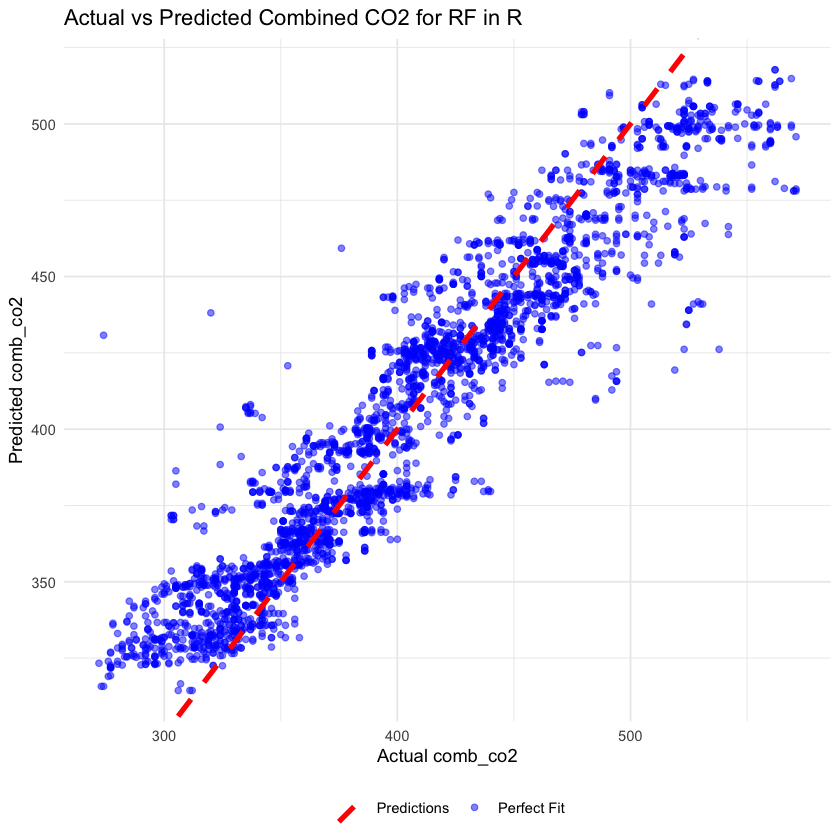

In [6]:
data_plot <- data.frame(
  Actual = actual,
  Predicted = predictions
)

p <- ggplot(data_plot, aes(x = Actual, y = Predicted)) +
  geom_point(aes(color = "Predictions"), alpha = 0.5) + 
  geom_abline(aes(color = "Perfect Fit", intercept = 0, slope = 1), linetype = "dashed", linewidth = 1.5) +
  scale_color_manual(values = c("Predictions" = "blue", "Perfect Fit" = "red"), name = "", labels = c("Predictions", "Perfect Fit")) +
  labs(title = "Actual vs Predicted Combined CO2 for RF in R", 
       x = "Actual comb_co2", 
       y = "Predicted comb_co2") +
  theme_minimal() +
  theme(legend.position = "bottom")

print(p)